<a href="https://colab.research.google.com/github/Manojnaik19/ML-project/blob/main/Day_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X=data.drop('target',axis=1)

In [ ]:
Y=data[['target']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=4)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212, 1), (91, 1))

<h2> Logistc Regression Grid SearchCV<h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
lr_model=LogisticRegression(penalty='l2')
val=list(np.arange(0.1,1,0.1))
parameters={'solver':('newton-cg','liblinear','sag','saga'),'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

In [ ]:
print(clf_lr.best_params_)

{'C': 0.30000000000000004, 'solver': 'newton-cg'}


In [ ]:
test_pred=clf_lr.predict(x_test)

In [ ]:
acc_lr_gs=accuracy_score(test_pred,y_test)
acc_lr_gs

0.8241758241758241

82.41% is the improved accuacry score

<h2>KNN classifier - GridsearchCV<h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,30, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

The accuracy is 80.21% on comparing with predicted output and original output

<h2>Trianing the model using KNN<h2>

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier(n_neighbors=3)

In [ ]:
neighbor.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [ ]:

print(clf_knn.best_params_)


{'n_neighbors': 18}


In [ ]:

test_pred_knn = clf_knn.predict(x_test)

In [ ]:

accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.6813186813186813

accuracy score is 68.13% whichis improved using GridsearchCV

**<h2>DTreeClassifier -GridSearchCV<h2>**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(5,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)
     

In [ ]:
print(clf_dtc.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}


In [ ]:

test_pred_dtc = clf_dtc.predict(x_test)

The accuracy is 

In [ ]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.7802197802197802

The  accuracy is 78.02% which is improved using GridSearchCV

<h2>Confusion Matrix

We have the accuracy of 82.41% using Linear Regression we use its predicted accuracy to find confusion matrix

<h3>Logistic Regression <h3>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[26,  4],
       [12, 49]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        38
           1       0.80      0.92      0.86        53

    accuracy                           0.82        91
   macro avg       0.83      0.80      0.81        91
weighted avg       0.83      0.82      0.82        91



<h3> KNN Classifier 

In [ ]:
confusion_matrix(test_pred_knn,y_test)

array([[25, 16],
       [13, 37]])

In [ ]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.74      0.70      0.72        53

    accuracy                           0.68        91
   macro avg       0.67      0.68      0.68        91
weighted avg       0.69      0.68      0.68        91



DTree Classifier 

In [ ]:
confusion_matrix(test_pred_dtc,y_test)

array([[26,  8],
       [12, 45]])

In [ ]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.79      0.85      0.82        53

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



Logistic regression gives the best recall value than other models

<h4>Using the graph of Reciever Operating Charecteristics Curve (ROC).FPR at the x axis and TPR at the y axis and to find ROC-AUC curve 

In [ ]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [ ]:
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
#tpr-->True Positive Rate
#fpr-->False Positive Rate
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

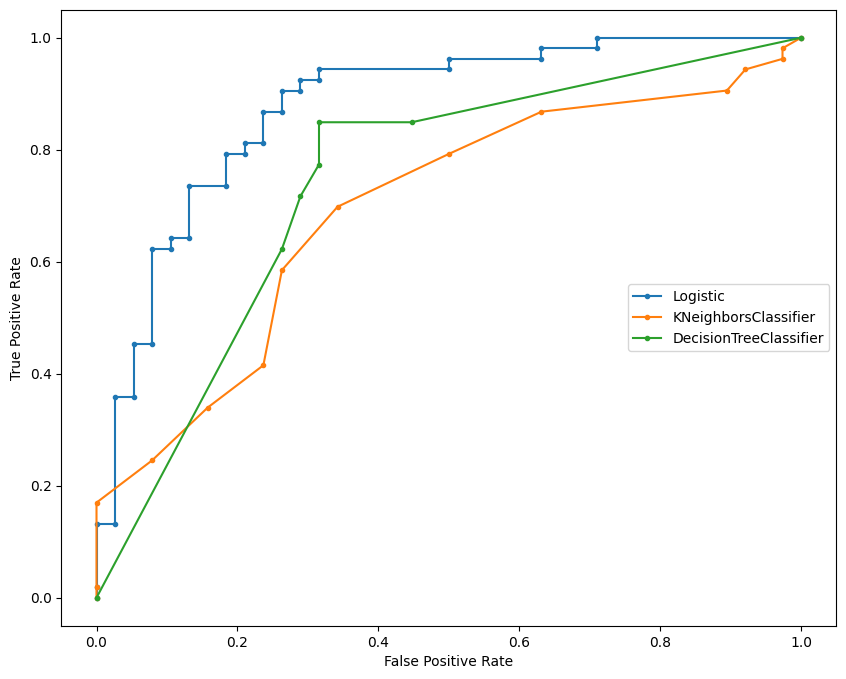

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=5)
plt.show()

We absorve that, from the above graph it clear that area under the Logistic Curve is more than the other two curves therefore it provides better accuracy over other.

Checking ROC_AUC curve 

In [ ]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 87.7 %
Logistic : ROC AUC = 69.39999999999999 %
Logistic : ROC AUC = 74.2 %


<h5>By providing the details of the patient as input and determining whether the patient lives or dies<h5> 

In [ ]:
# from pandas.core.window.expanding import ExpandingGroupby
# from matplotlib.projections.polar import ThetaAxis
# n = int(input("Enter no of Patients who's Status is to be Determined :- "))

# def Prediction() :
#   age = int(input("Age of the Patient :- "))
#   sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
#   cp = int(input("Chest Pain Type :- "))
#   trestbps = int(input("Resting Blood Pressure :- "))
#   chol = int(input("Serum Cholestrol :- "))
#   fbs = int(input("Fasting Blood Sugar :- "))
#   restecg = int(input("Resting ElectroCardiographic Result :- "))
#   thalach = int(input("Maximum Heart Rate Achieved :- "))
#   exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
#   oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
#   slope = int(input("Slope of Peak Exercise ST segment :- "))
#   ca = int(input("No. of Major Vessels (0-3) :- "))
#   thal = int(input("Thalasemia Indicator :- "))
#   new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

#   #converting to 2D array
#   new_patient = new_patient.reshape(1,-1)

#   if clf_lr.predict(new_patient) == 0 :
#     return "The Patient with the above provided Vitals Dies!!!"
#   else :
#     return "The Patient with the above provided vitals Lives!!!"

# for i in range(n) :
#   print(Prediction())
     

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient :- 40
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type :- 2
Resting Blood Pressure :- 130
Serum Cholestrol :- 230
Fasting Blood Sugar :- 1
Resting ElectroCardiographic Result :- 1
Maximum Heart Rate Achieved :- 145
Exercise-include angina (1 - True, 0 - False) :- 1
ST Depression induced by Exercise relative to Rest :- 2.5
Slope of Peak Exercise ST segment :- 0
No. of Major Vessels (0-3) :- 1
Thalasemia Indicator :- 1
The Patient with the above provided Vitals Dies!!!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Form the above provided information of random patient,The model has predicted the that Patient Dies!!!. 